Use transfer learning with pretrained models to achieve greater accuracy on the Fashion MNIST dataset. Transfer learning involves taking a pretrained model, typically trained on a large dataset like ImageNet, and fine-tuning it on a new, smaller dataset like Fashion MNIST. This can help improve the model's performance on the new task, as the pretrained model has already learned useful features from the larger dataset.

Here are the steps you can follow to perform transfer learning on Fashion MNIST:

1. Choose a Pretrained Model: Select a pretrained model architecture that has been proven to work well on image classification tasks. Popular choices include models like VGG, ResNet, Inception, or MobileNet. You can use pretrained models available in deep learning libraries like TensorFlow and PyTorch.

2. Modify the Model: Remove the original classification layer of the pretrained model, which is typically designed for a different task (e.g., 1000 classes in ImageNet), and replace it with a new classification layer that matches the number of classes in Fashion MNIST (which is 10 classes: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot).

3. Freeze Layers (Optional): You can choose to freeze some of the earlier layers in the pretrained model if you have limited data or computational resources. This prevents these layers from being updated during training.

4. Data Preprocessing: Preprocess your Fashion MNIST data to match the input format expected by the pretrained model. This usually involves resizing the images to the input size of the pretrained model and normalizing pixel values.

5. Training: Train the modified model on the Fashion MNIST dataset. You can use techniques like data augmentation to further improve performance.

6. Fine-Tuning: Fine-tune the model by updating the weights of the new classification layer and optionally some of the earlier layers. You can experiment with different learning rates for fine-tuning.

7. Evaluate: Evaluate the model on a validation dataset to monitor its performance. Adjust hyperparameters and training strategies as needed.

8. Test: Finally, test the model on a separate test dataset to assess its accuracy and generalization to new data.

By using a pretrained model as a starting point, you can benefit from the knowledge learned from a large dataset and potentially achieve better accuracy on Fashion MNIST with fewer training examples and less training time than training a model from scratch.

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
import cv2
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Resize images to 32x32 pixels and convert to 3-channel RGB
x_train_rgb = [cv2.cvtColor(cv2.resize(img, (32, 32)), cv2.COLOR_GRAY2RGB) for img in x_train]
x_test_rgb = [cv2.cvtColor(cv2.resize(img, (32, 32)), cv2.COLOR_GRAY2RGB) for img in x_test]

# Normalize pixel values to [0, 1]
x_train_rgb = np.array(x_train_rgb, dtype='float32') / 255.0
x_test_rgb = np.array(x_test_rgb, dtype='float32') / 255.0

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Create a VGG16 base model (excluding top layers)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom classification layers on top of VGG16
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')  # 10 classes for Fashion MNIST
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation to improve training
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rotation_range=10,
    zoom_range=0.1
)

datagen.fit(x_train_rgb)

# Train the model
batch_size = 64
epochs = 30
history = model.fit(datagen.flow(x_train_rgb, y_train, batch_size=batch_size),
                    steps_per_epoch=len(x_train_rgb) / batch_size,
                    epochs=epochs,
                    validation_data=(x_test_rgb, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test_rgb, y_test, verbose=2)
print(f"Test accuracy: {test_acc * 100:.2f}%")


Epoch 1/30
937/937 [==============================] - 58s 54ms/step - loss: 0.9612 - accuracy: 0.6208 - val_loss: 0.5683 - val_accuracy: 0.7860
Epoch 2/30
937/937 [==============================] - 50s 53ms/step - loss: 0.5279 - accuracy: 0.8138 - val_loss: 0.3979 - val_accuracy: 0.8596
Epoch 3/30
937/937 [==============================] - 50s 53ms/step - loss: 0.4222 - accuracy: 0.8507 - val_loss: 0.3674 - val_accuracy: 0.8572
Epoch 4/30
937/937 [==============================] - 49s 53ms/step - loss: 0.3933 - accuracy: 0.8659 - val_loss: 0.3420 - val_accuracy: 0.8802
Epoch 5/30
937/937 [==============================] - 49s 53ms/step - loss: 0.3520 - accuracy: 0.8768 - val_loss: 0.3113 - val_accuracy: 0.8926
Epoch 6/30
937/937 [==============================] - 49s 53ms/step - loss: 0.3227 - accuracy: 0.8860 - val_loss: 0.3462 - val_accuracy: 0.8832
Epoch 7/30
937/937 [==============================] - 49s 52ms/step - loss: 0.3228 - accuracy: 0.8884 - val_loss: 0.3097 - val_accuracy:

<function matplotlib.pyplot.show(close=None, block=None)>

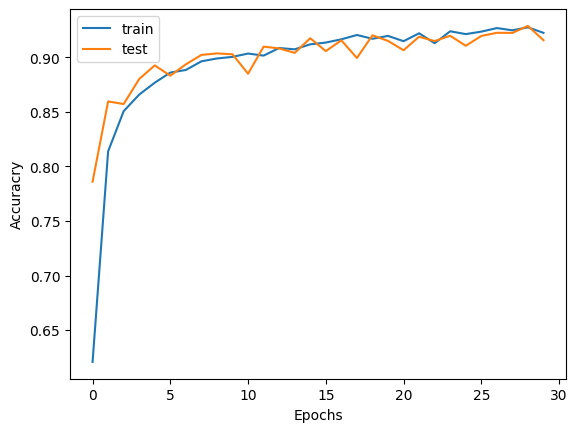

In [5]:
import matplotlib.pyplot as plt
# plot the accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracry')
plt.legend(['train','test'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

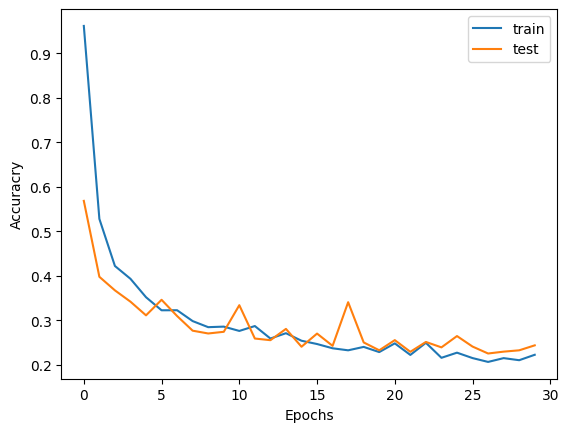

In [6]:
# plot the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Accuracry')
plt.legend(['train','test'])
plt.show

In [7]:
model.save("VGG16_FashionMNIST.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
# predict
y_pred=model.predict(x_test_rgb)

313/313 [==============================] - 2s 7ms/step


In [13]:
import numpy as np
y_predict=np.argmax(y_pred,axis=1)

In [17]:
# reload dataset as the y_test was one-hot encoded
 (x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()

In [18]:
from sklearn.metrics import confusion_matrix
matrix=confusion_matrix(y_test,y_predict)
matrix

array([[849,   1,  14,   9,   1,   0, 123,   0,   3,   0],
       [  1, 986,   0,  10,   1,   0,   0,   0,   2,   0],
       [ 12,   1, 842,   8,  71,   0,  66,   0,   0,   0],
       [ 25,   7,   7, 877,  25,   0,  59,   0,   0,   0],
       [  0,   0,  13,  15, 945,   0,  27,   0,   0,   0],
       [  0,   0,   0,   0,   0, 953,   0,  37,   0,  10],
       [ 70,   0,  25,  13, 114,   0, 776,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0,   0, 992,   0,   8],
       [  1,   0,   1,   0,   5,   1,   2,   1, 989,   0],
       [  0,   0,   0,   0,   1,   5,   0,  45,   1, 948]])

<Axes: >

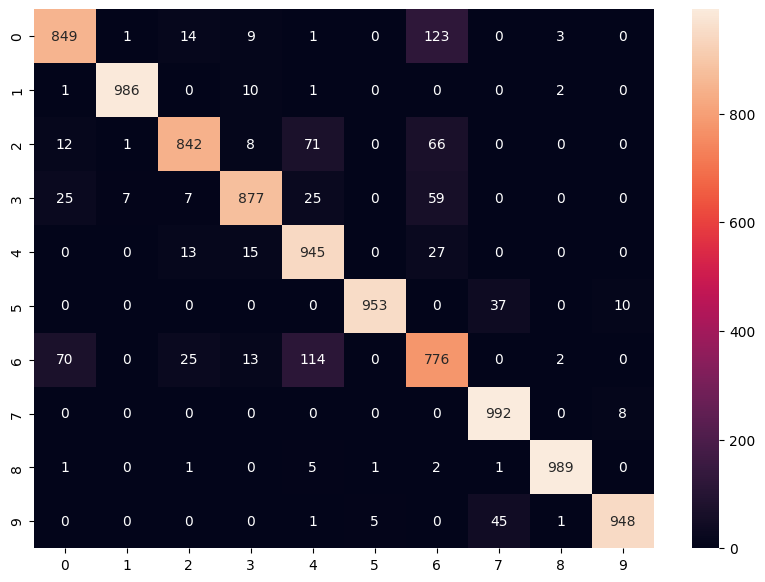

In [19]:
import seaborn as sns
plt.figure(figsize=(10,7))
sns.heatmap(matrix,annot=True,fmt='d')